In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.grid

In [2]:
df=pd.read_csv("./data/Classified Data")

In [6]:
df

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1
...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,1.010953,1.034006,0.853116,0.622460,1.036610,0.586240,0.746811,0.319752,1.117340,1.348517,1
996,996,0.575529,0.955786,0.941835,0.792882,1.414277,1.269540,1.055928,0.713193,0.958684,1.663489,0
997,997,1.135470,0.982462,0.781905,0.916738,0.901031,0.884738,0.386802,0.389584,0.919191,1.385504,1
998,998,1.084894,0.861769,0.407158,0.665696,1.608612,0.943859,0.855806,1.061338,1.277456,1.188063,1


In [41]:
# df.groupby("TARGET CLASS")["WTT"].count()
df.groupby("TARGET CLASS")["WTT"].nunique()

TARGET CLASS
0    500
1    500
Name: WTT, dtype: int64

In [3]:
from sklearn.preprocessing import StandardScaler

In [4]:
scl=StandardScaler()

In [5]:
scl.fit(df.drop("TARGET CLASS",axis=1))

StandardScaler()

In [6]:
sc=scl.transform(df.drop("TARGET CLASS",axis=1))

In [11]:
sc

array([[-1.73031962, -0.12354188,  0.18590747, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.72685552, -1.08483602, -0.43034845, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-1.72339142, -0.78870217,  0.33931821, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 1.72339142,  0.64177714, -0.51308341, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 1.72685552,  0.46707241, -0.98278576, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [ 1.73031962, -0.38765353, -0.59589427, ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [7]:
sv=pd.DataFrame(sc,columns=df.columns[:-1])

In [8]:
sv.describe()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
count,1000.00000,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,0.00000,1.278977e-16,-2.966516e-16,-1.079137e-16,-1.705303e-16,-6.075140e-16,2.842171e-17,6.625811e-16,-4.805045e-16,3.286260e-16,4.556355e-16
std,1.00050,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-1.73032,-2.678050e+00,-2.618747e+00,-2.275858e+00,-2.775551e+00,-2.947206e+00,-2.660802e+00,-2.620466e+00,-2.674465e+00,-2.701361e+00,-3.542140e+00
25%,-0.86516,-7.161683e-01,-6.702761e-01,-7.504105e-01,-7.279635e-01,-6.637361e-01,-7.127975e-01,-7.020467e-01,-7.120098e-01,-7.626629e-01,-6.863610e-01
50%,0.00000,-3.180217e-02,1.628137e-02,-7.159299e-02,-2.293699e-02,1.433731e-02,-7.940354e-03,-7.093937e-02,-2.236584e-02,2.488297e-02,6.194010e-02
75%,0.86516,7.378939e-01,7.534412e-01,6.664646e-01,6.631695e-01,6.820374e-01,7.012930e-01,6.723000e-01,7.311915e-01,7.661087e-01,6.961851e-01
max,1.73032,2.667092e+00,2.799904e+00,3.049325e+00,4.151021e+00,2.538987e+00,2.825739e+00,2.940974e+00,2.470109e+00,2.477734e+00,2.602476e+00


In [17]:
df.describe()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,499.500000,0.949682,1.114303,0.834127,0.682099,1.032336,0.943534,0.963422,1.071960,1.158251,1.362725,0.50000
std,288.819436,0.289635,0.257085,0.291554,0.229645,0.243413,0.256121,0.255118,0.288982,0.293738,0.204225,0.50025
min,0.000000,0.174412,0.441398,0.170924,0.045027,0.315307,0.262389,0.295228,0.299476,0.365157,0.639693,0.00000
25%,249.750000,0.742358,0.942071,0.615451,0.515010,0.870855,0.761064,0.784407,0.866306,0.934340,1.222623,0.00000
50%,499.500000,0.940475,1.118486,0.813264,0.676835,1.035824,0.941502,0.945333,1.065500,1.165556,1.375368,0.50000
75%,749.250000,1.163295,1.307904,1.028340,0.834317,1.198270,1.123060,1.134852,1.283156,1.383173,1.504832,1.00000
max,999.000000,1.721779,1.833757,1.722725,1.634884,1.650050,1.666902,1.713342,1.785420,1.885690,1.893950,1.00000


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X=sv
y=df["TARGET CLASS"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
knn=KNeighborsClassifier(n_neighbors=1)

In [13]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [14]:
pr=knn.predict(X_test)

In [15]:
from sklearn.metrics import classification_report,confusion_matrix

In [62]:
confusion_matrix(y_test,pr)

array([[145,  14],
       [ 12, 129]])

In [63]:
print(classification_report(y_test,pr))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92       159
           1       0.90      0.91      0.91       141

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



# elbo method 
## used for finding k value with least error rate

In [33]:
err=list()
c=None
for i in range(1,35):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pr=knn.predict(X_test)
    print(np.mean(pr != y_test))
    err.append(np.mean(pr != y_test))

0.08666666666666667
0.09
0.07666666666666666
0.07333333333333333
0.08
0.06666666666666667
0.07666666666666666
0.06666666666666667
0.06333333333333334
0.06666666666666667
0.056666666666666664
0.06
0.07
0.06666666666666667
0.06666666666666667
0.06666666666666667
0.06666666666666667
0.07
0.07333333333333333
0.06
0.06333333333333334
0.056666666666666664
0.05333333333333334
0.05
0.05
0.04666666666666667
0.05333333333333334
0.05
0.05
0.043333333333333335
0.05
0.05
0.05333333333333334
0.05333333333333334


In [32]:
print(np.mean( [int(i) for i in  """0 0 0 1 0 0 1 1 1 0 1 0 0 1 0 1 1 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 1 0 0
 0 1 0 1 0 0 1 1 0 1 1 0 1 0 1 1 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0 0 1 0
 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 1 0 0
 0 0 0 1 0 1 1 0 1 1 1 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 1 1 0 0 1 1 0 1 0 0 0
 1 1 1 0 1 1 1 1 0 1 0 0 1 1 0 1 1 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 1 1 1 0 1
 0 1 1 0 1 1 1 0 1 1 1 0 1 0 1 0 0 1 1 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1
 0 0 1 1 1 1 0 0 1 1 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 1 0 1 1
 0 1 0 1 1 1 0 0 1 1 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 0 1 1 0 0 0 1 1 1 0
 1 1 1 0""" if i!=" " and i!="\n"] != c))

0.08666666666666667


In [35]:
import matplotlib.pyplot as plt

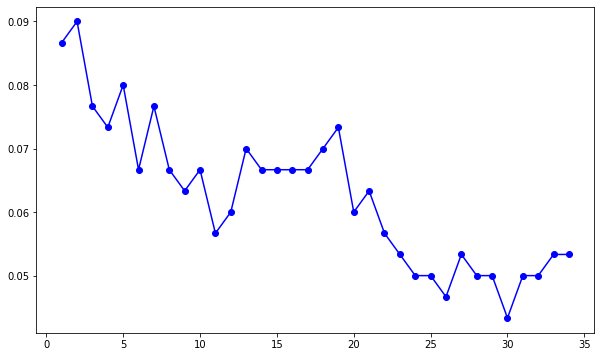

In [38]:
plt.figure(figsize=(10,6))
plt.plot(range(1,35),err,"bo-")

In [41]:
c=list(zip(range(1,35),err))

In [64]:
sorted(c,key=lambda x:x[1])[0]

(30, 0.043333333333333335)

### k=30 will be good for result

In [66]:
knn=KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train,y_train)
pr=knn.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pr))
print(classification_report(y_test,pr))

[[153   6]
 [  7 134]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       159
           1       0.96      0.95      0.95       141

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



In [67]:
fd=pd.read_csv("./data/KNN_Project_Data.csv")

### process is called standardisation of data

In [68]:
ss=StandardScaler()

In [70]:
ss.fit(fd.drop("TARGET CLASS",axis=1))

StandardScaler()

In [71]:
sb=ss.transform(fd.drop("TARGET CLASS",axis=1))

In [73]:
sbb=pd.DataFrame(sb,columns=fd.columns[:-1])

In [75]:
sbb.describe()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,3.019807e-17,1.740830e-16,4.263256e-17,1.438849e-16,-1.589839e-16,-2.788880e-16,-1.687539e-16,-7.815970e-17,-5.115908e-16,1.776357e-17
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-2.788339e+00,-2.474303e+00,-2.340083e+00,-3.409927e+00,-2.668575e+00,-3.087121e+00,-2.555607e+00,-2.215822e+00,-2.648319e+00,-2.503543e+00
25%,-7.757873e-01,-7.574735e-01,-7.293713e-01,-6.538711e-01,-6.936419e-01,-6.718168e-01,-7.168625e-01,-7.266069e-01,-7.136450e-01,-6.921254e-01
50%,-2.472083e-02,-3.442255e-02,-1.072910e-02,3.566665e-02,-3.590482e-03,2.911148e-02,8.155695e-03,-8.463946e-02,2.489807e-02,-1.931429e-02
75%,7.308466e-01,7.235137e-01,7.215308e-01,7.386505e-01,6.998930e-01,6.919471e-01,7.032086e-01,6.650219e-01,6.978394e-01,7.253420e-01
max,2.863927e+00,3.009948e+00,2.579241e+00,2.451642e+00,2.465393e+00,2.518753e+00,2.732696e+00,3.198000e+00,3.060964e+00,2.881896e+00


In [80]:
sbv=pd.concat([sbb,fd["TARGET CLASS"]],axis=1)

In [85]:
sns.pairplot(sbv,hue="TARGET CLASS")

# sns.pairplot(fd,hue="TARGET CLASS")
## and upper look same obvious

# as with interclass data we can't basicaly  do EDA

In [86]:
X_train, X_test, y_train, y_test = train_test_split(sbb,fd["TARGET CLASS"], test_size=0.3, random_state=101)

In [88]:
d1=KNeighborsClassifier(n_neighbors=1)

In [89]:
d1.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [90]:
pre=d1.predict(X_test)

In [92]:
confusion_matrix(y_test,pre)

array([[109,  43],
       [ 41, 107]])

In [94]:
print(classification_report(y_test,pre))

              precision    recall  f1-score   support

           0       0.73      0.72      0.72       152
           1       0.71      0.72      0.72       148

    accuracy                           0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.72      0.72      0.72       300



In [95]:
er=list()
for i in range(1,40):
    d1=KNeighborsClassifier(n_neighbors=i)
    d1.fit(X_train,y_train)
    pre1=d1.predict(X_test)
    er.append(np.mean(pre1 != y_test))

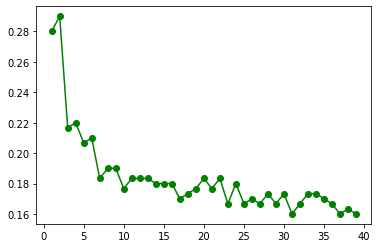

In [98]:
plt.plot(range(1,40),er,'go-')

In [99]:
c2=list(zip(range(1,40),er))

In [103]:
sorted(c2,key=lambda x:x[1])[0]

(31, 0.16)

In [106]:
d1=KNeighborsClassifier(n_neighbors=31)
d1.fit(X_train,y_train)
pre1=d1.predict(X_test)
print(confusion_matrix(y_test,pre1))
print(classification_report(y_test,pre1))

[[123  29]
 [ 19 129]]
              precision    recall  f1-score   support

           0       0.87      0.81      0.84       152
           1       0.82      0.87      0.84       148

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300

